In [ ]:
# importing libs and remember keras is integrated into tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator,img_to_array   
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dropout
from tensorflow.keras.layers import Dense, Activation, Flatten
import keras
import numpy as np
import pandas as pd
import os
import random
import cv2
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# reading paths
train_dir = r'/content/drive/MyDrive/Train'
validation_dir = '/content/drive/MyDrive/Test'
test_dir = '/content/drive/MyDrive/Ethnic_classification'

In [ ]:
# data preprocessing
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40,
                                   width_shift_range=0.2,height_shift_range=0.2,
                                   shear_range=0.2,zoom_range=0.2,
                                   horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size = (150,150),batch_size = 20,
                                                    class_mode = 'categorical')
val_generator = val_datagen.flow_from_directory(validation_dir,target_size = (150,150),batch_size = 20,
                                                    class_mode = 'categorical')


Found 2509 images belonging to 3 classes.
Found 629 images belonging to 3 classes.


In [ ]:
# class names dir
class_names = ['chinese','pakistani','russian']

In [ ]:
# plotting images

def plots(ims,figsize=(16,16),rows = 4,interp=False,titles = None):
  f = plt.figure(figsize = figsize)
  cols = len(ims)//rows if len(ims)%2==0 else len(ims)//rows + 1
  for i in range (len(ims)):
    sp = f.add_subplot(rows,cols,i+1)
    sp.axis('off')
    sp.set_title(class_names[titles[i].tolist().index(1)],fontsize = 16)
    plt.imshow(ims[i])

        

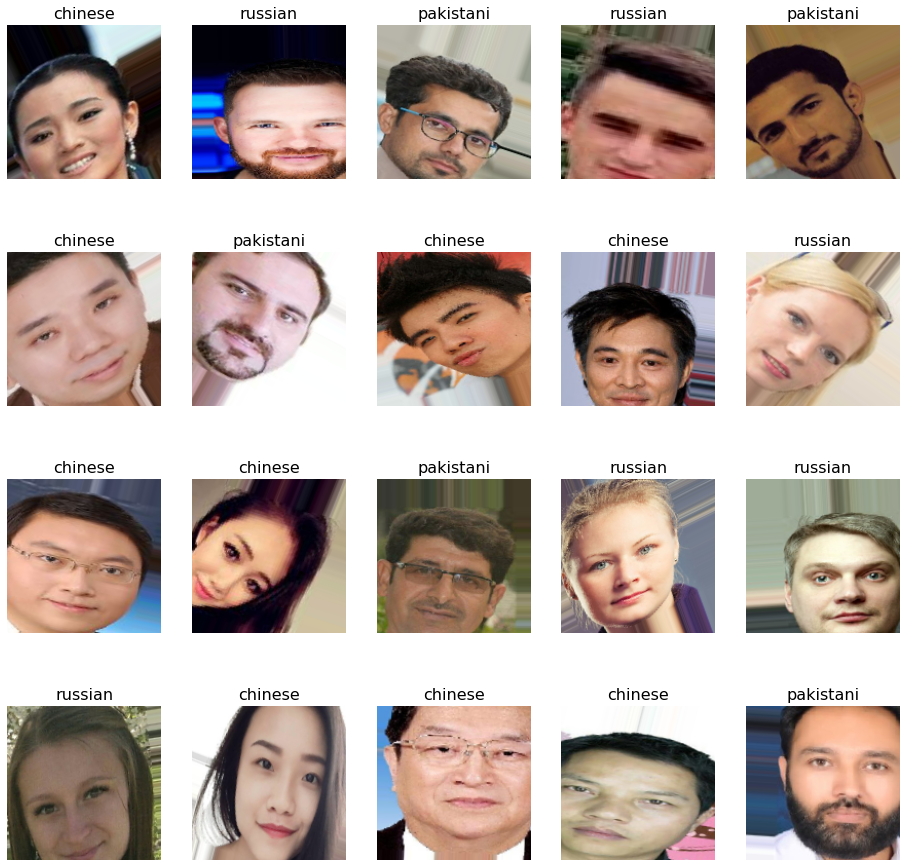

In [ ]:
# visuals
imgs,labels = next(train_generator)
plots(imgs,titles=labels)

In [ ]:
# CNN archtecture
from keras import models,layers
model = models.Sequential()
model.add(layers.Conv2D(filters = 32,kernel_size = (5,5),activation='relu',input_shape= (150,150,3)))
model.add(layers.MaxPool2D(pool_size = (2,2)))
model.add(layers.Conv2D(filters = 32,kernel_size = (5,5),activation='relu'))
model.add(layers.MaxPool2D(pool_size = (2,2)))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Flatten())
model.add(layers.Dense(8,activation = 'relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(3,activation = 'softmax'))


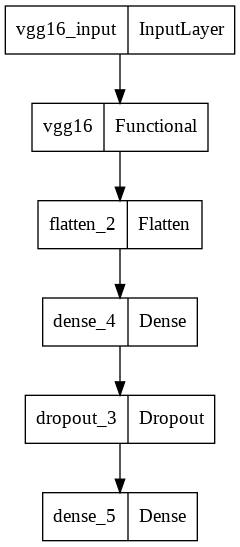

<Figure size 432x288 with 0 Axes>

In [ ]:
# model graph for my ref

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model

from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from IPython.core.display import Image
plt.savefig('D:/Engineering/4 Sem/Mini Project/Ours/model_plot.jpg')

keras.utils.plot_model(model)



In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 146, 146, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 34, 34, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 34, 34, 32)        0         
                                                                 
 flatten (Flatten)           (None, 36992)            

In [ ]:
# model compilation
from tensorflow.keras import optimizers
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy']
             )


In [ ]:
# model training

history = model.fit(
    train_generator,steps_per_epoch = 125,epochs = 30, #dtasize//batch_size(2509//20)
    validation_data= val_generator,validation_steps = 31 #dtasize//batch_size(630//20)
)

Epoch 1/30
125/125 [==============================] - 32s 256ms/step - loss: 0.4120 - accuracy: 0.8650 - val_loss: 0.3024 - val_accuracy: 0.9210
Epoch 2/30
125/125 [==============================] - 32s 259ms/step - loss: 0.4379 - accuracy: 0.8513 - val_loss: 0.2234 - val_accuracy: 0.9403
Epoch 3/30
125/125 [==============================] - 31s 245ms/step - loss: 0.4311 - accuracy: 0.8582 - val_loss: 0.2340 - val_accuracy: 0.9258
Epoch 4/30
125/125 [==============================] - 31s 248ms/step - loss: 0.3907 - accuracy: 0.8730 - val_loss: 0.2215 - val_accuracy: 0.9532
Epoch 5/30
125/125 [==============================] - 31s 250ms/step - loss: 0.4107 - accuracy: 0.8598 - val_loss: 0.2892 - val_accuracy: 0.9258
Epoch 6/30
125/125 [==============================] - 32s 257ms/step - loss: 0.4049 - accuracy: 0.8626 - val_loss: 0.3409 - val_accuracy: 0.9242
Epoch 7/30
125/125 [==============================] - 31s 249ms/step - loss: 0.3867 - accuracy: 0.8734 - val_loss: 0.2859 - val_ac

In [ ]:
#model saving
model.save("model.h5")

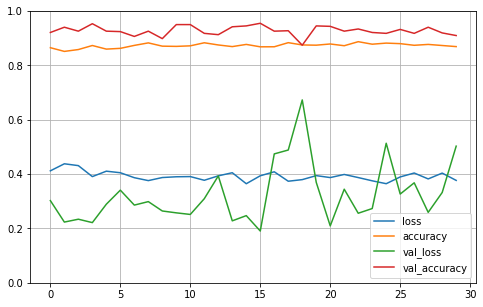

In [ ]:
# graphical analysis of the accuracies

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
#testing

test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(test_dir,target_size = (150,150),batch_size = 20,
                                                    class_mode = 'categorical')

Found 45 images belonging to 3 classes.


In [ ]:
from tensorflow import keras
model = keras.models.load_model("model.h5")

In [ ]:
#evaluation
model.evaluate(test_generator,steps = 9)

9/9 [==============================] - 1s 146ms/step - loss: 0.8611 - accuracy: 0.8000


[0.8611288070678711, 0.800000011920929]

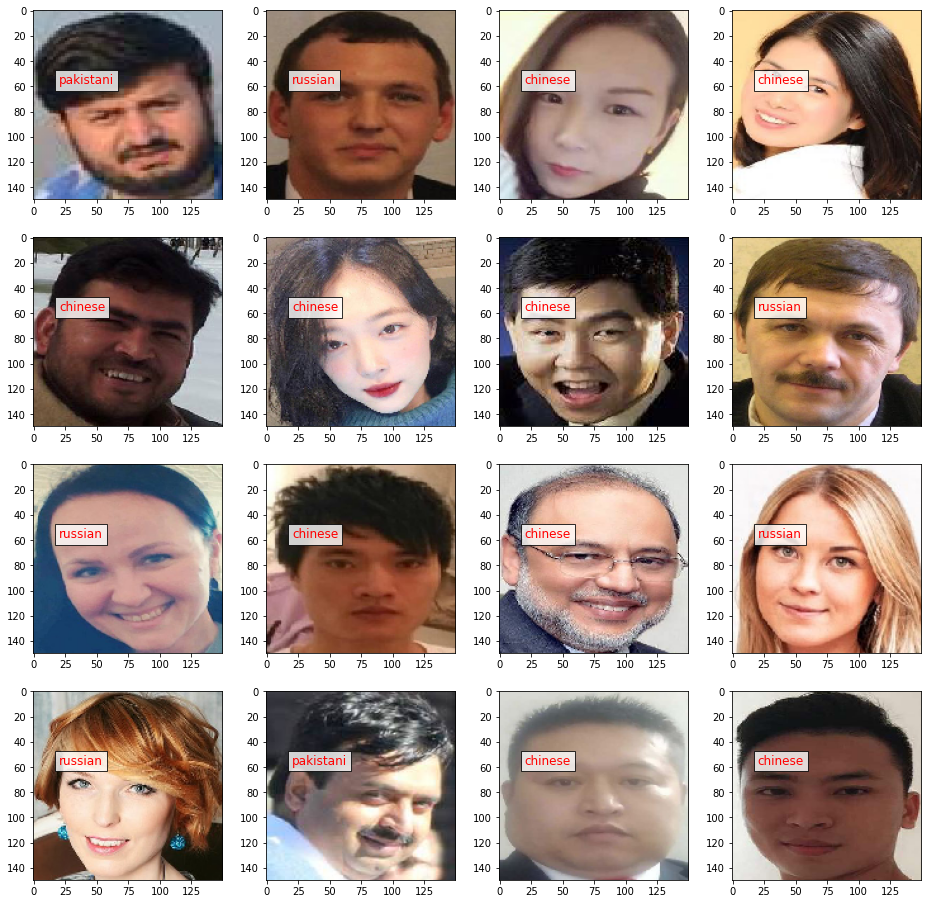

In [ ]:
#prediction 

imgs,labels = next(test_generator)
fig = plt.figure(figsize=(16,16))
columns = 4
rows = 4
for i in range(columns*rows):
  fig.add_subplot(rows,columns,i+1)
  img_t = np.expand_dims(imgs[i],axis = 0)
  prediction = model.predict(img_t)
  idx = prediction[0].tolist().index(max(prediction[0]))
  plt.text(20,58,class_names[idx],color = 'red',fontsize=12,bbox = dict(facecolor= 'white',alpha = 0.8))
  plt.imshow(imgs[i])
  plt.savefig('output')

In [ ]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58900480/58889256 [==============================] - 0s 0us/step


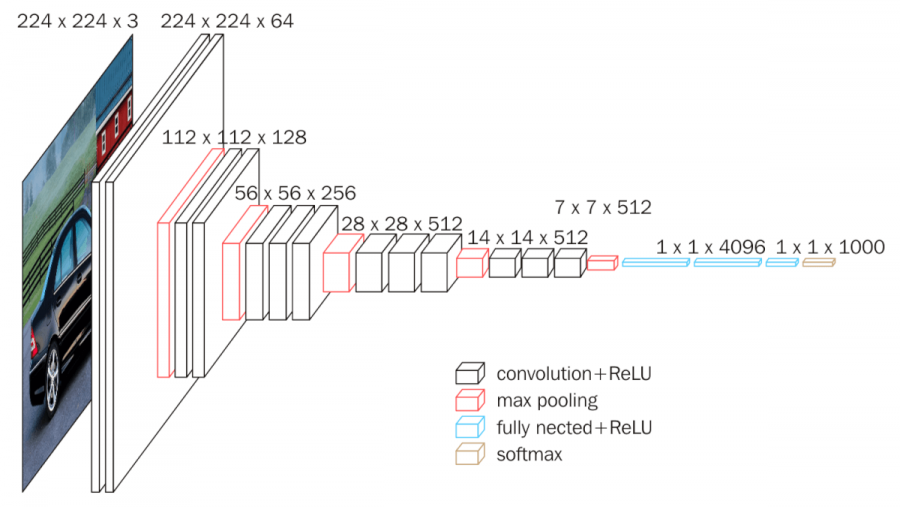

<Figure size 432x288 with 0 Axes>

In [ ]:
from IPython.core.display import Image, display
plt.savefig('VGG_architecture.jpg')
display(Image('https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png', width=700, unconfined=True))

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
#Adding layers to VGG16
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(3, activation='softmax'))

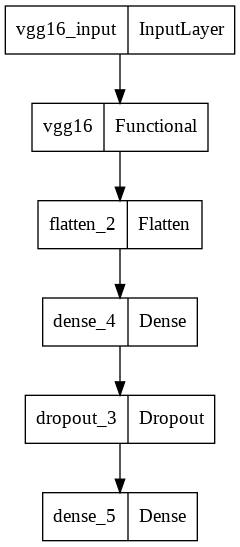

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model

from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from IPython.core.display import Image

keras.utils.plot_model(model)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 8)                 65544     
                                                                 
 dropout_3 (Dropout)         (None, 8)                 0         
                                                                 
 dense_5 (Dense)             (None, 3)                 27        
                                                                 
Total params: 14,780,259
Trainable params: 14,780,259
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras import optimizers
model.compile(
    loss='categorical_crossentropy', 
    optimizer=optimizers.RMSprop(lr=2e-5),
    metrics=['accuracy']  
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=100, 
      epochs=30,
      validation_data=val_generator,
      validation_steps=31)  

Epoch 1/30
100/100 [==============================] - 32s 276ms/step - loss: 1.0994 - accuracy: 0.3399 - val_loss: 1.0772 - val_accuracy: 0.3516
Epoch 2/30
100/100 [==============================] - 26s 263ms/step - loss: 1.0741 - accuracy: 0.3751 - val_loss: 0.9782 - val_accuracy: 0.4419
Epoch 3/30
100/100 [==============================] - 26s 261ms/step - loss: 0.9850 - accuracy: 0.5289 - val_loss: 0.8447 - val_accuracy: 0.7048
Epoch 4/30
100/100 [==============================] - 26s 259ms/step - loss: 0.9343 - accuracy: 0.5887 - val_loss: 0.8433 - val_accuracy: 0.7403
Epoch 5/30
100/100 [==============================] - 26s 258ms/step - loss: 0.8195 - accuracy: 0.6525 - val_loss: 0.5400 - val_accuracy: 0.8210
Epoch 6/30
100/100 [==============================] - 26s 257ms/step - loss: 0.7414 - accuracy: 0.6993 - val_loss: 0.5759 - val_accuracy: 0.8210
Epoch 7/30
100/100 [==============================] - 26s 261ms/step - loss: 0.6920 - accuracy: 0.7250 - val_loss: 0.4454 - val_ac

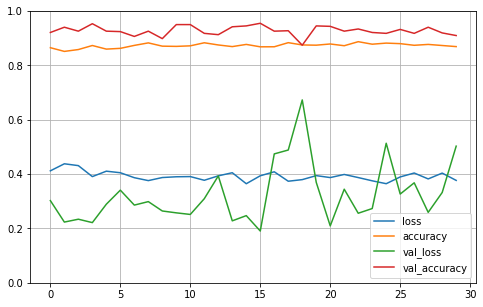

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.savefig('VGGaccuracy.jpg')
plt.show()

In [ ]:
model.save("model_vgg.h5") 

In [ ]:
model = tf.keras.models.load_model('model_vgg.h5')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 8)                 65544     
                                                                 
 dropout_3 (Dropout)         (None, 8)                 0         
                                                                 
 dense_5 (Dense)             (None, 3)                 27        
                                                                 
Total params: 14,780,259
Trainable params: 14,780,259
Non-trainable params: 0
_________________________________________________________________


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 45 images belonging to 3 classes.


In [ ]:
#post transfer learning
model.evaluate(test_generator, steps=9)

9/9 [==============================] - 0s 16ms/step - loss: 0.6540 - accuracy: 0.8667


[0.6540431380271912, 0.8666666746139526]

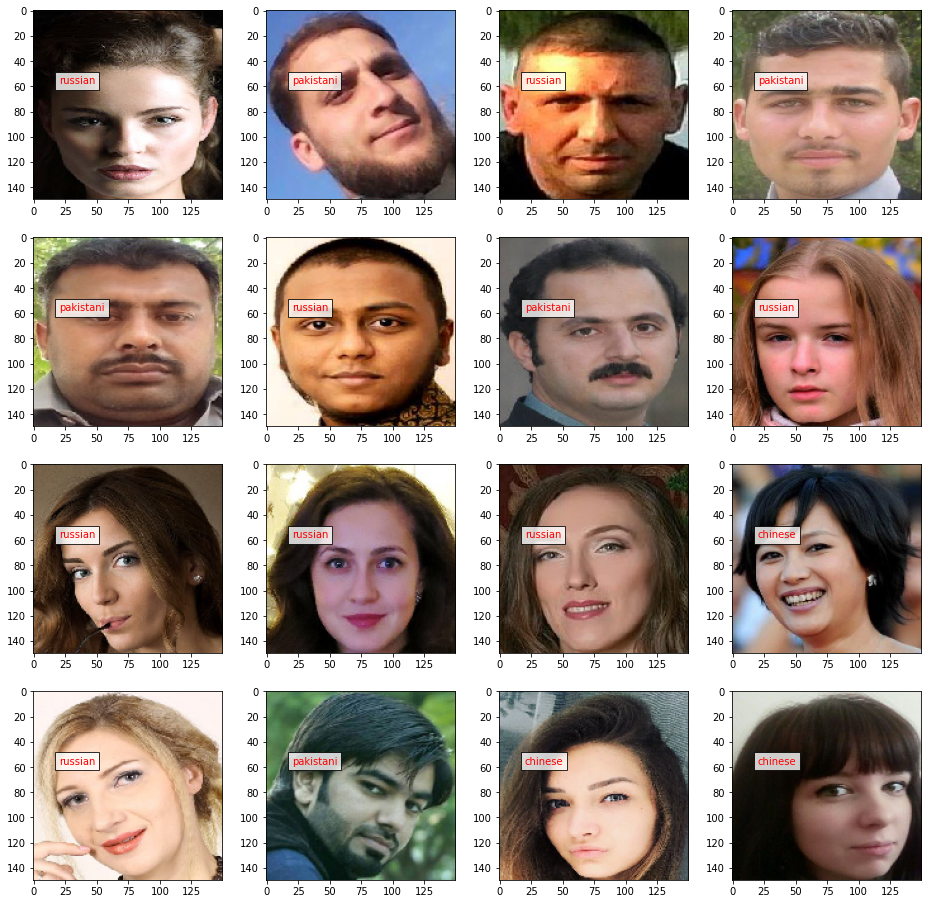

In [ ]:
imgs, labels = next(test_generator)
fig=plt.figure(figsize=(16, 16))
columns = 4
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img_t= np.expand_dims(imgs[i], axis=0)
    prediction = model.predict(img_t) 
    idx = prediction[0].tolist().index(max(prediction[0]))
    plt.text(20, 58,class_names[idx],color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(imgs[i])
plt.savefig('vgg_pred')